In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def hair_noise_removal(image):

    grayScale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY )

    kernel = cv2.getStructuringElement(1,(9,9))
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    blk= cv2.GaussianBlur(blackhat,(3,3),cv2.BORDER_DEFAULT)
    _,mask = cv2.threshold(blk,10,255,cv2.THRESH_BINARY)

    result = cv2.inpaint(image,mask,6,cv2.INPAINT_TELEA)

    return result

In [ ]:
def downscale(image):
  img = cv2.resize(image, (60, 45), fx = 0.1, fy = 0.1)
  return img

In [ ]:
import os
import shutil
from pathlib import Path

def create_folder(folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

def extract_images(source_folder1, source_folder2, destination_folder):
    create_folder(destination_folder)
    extract_images_from_folder(source_folder1, destination_folder)
    extract_images_from_folder(source_folder2, destination_folder)

def extract_images_from_folder(source_folder, destination_folder):
    files = os.listdir(source_folder)
    for file in files:
      source_file_path = os.path.join(source_folder, file)
      destination_file_path = os.path.join(destination_folder, file)
      shutil.copy2(source_file_path, destination_file_path)

In [ ]:
source_folder1 = '/content/drive/MyDrive/PR dataset/HAM10000_images_part_1'
source_folder2 = '/content/drive/MyDrive/PR dataset/HAM10000_images_part_2'
destination_folder = '/content/drive/MyDrive/PR dataset/SD_Images'

extract_images(source_folder1, source_folder2, destination_folder)

In [ ]:
from PIL import Image

def transformation(source_path,destination_path):
  i=0
  create_folder(destination_path)
  files = os.listdir(source_path)
  for file in files:
      fname = source_path +'/'+ file
      img = np.array(Image.open(fname))
      img = hair_noise_removal(img)
      img = downscale(img)
      fname = destination_path +'/'+ file
      cv2.imwrite(fname, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
      i+=1
      if i%500==0:
        print(i,'Done')

In [ ]:
source_path = destination_folder
destination_path = '/content/drive/MyDrive/PR dataset/Scaled_Images'
transformation(source_path,destination_path)

500 Done
1000 Done
1500 Done
2000 Done
2500 Done
3000 Done
3500 Done
4000 Done
4500 Done
5000 Done
5500 Done
6000 Done
6500 Done
7000 Done
7500 Done
8000 Done
8500 Done
9000 Done
9500 Done
10000 Done


In [ ]:
import os
len(os.listdir('/content/drive/MyDrive/PR dataset/Scaled_Images'))

10015

In [ ]:
Samples = ['ISIC_0034307.jpg', 'ISIC_0034293.jpg', 'ISIC_0034299.jpg', 'ISIC_0034295.jpg']

Considered Random Samples from Dataset


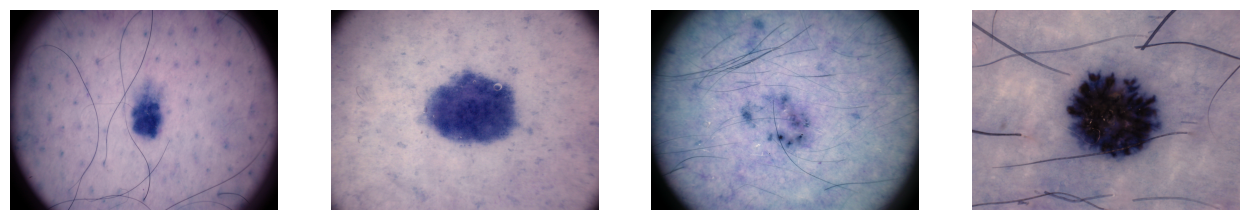

In [ ]:
fig = plt.figure(figsize=(20, 3))
for i, iname in enumerate(Samples):
    img_path = '/content/drive/MyDrive/PR dataset/SD_Images/'+iname
    img = cv2.imread(img_path)
    ax = fig.add_subplot(1, 5, i + 1)
    ax.imshow(img)
    ax.axis('off')

plt.show()

Applying noise removal

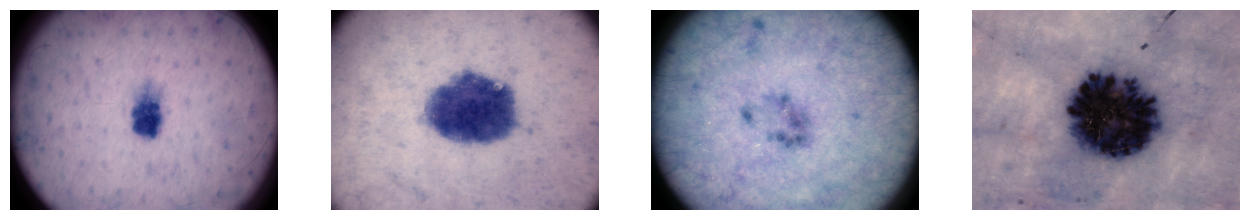

In [ ]:
fig = plt.figure(figsize=(20, 4))
for i, iname in enumerate(Samples):
    img_path = '/content/drive/MyDrive/PR dataset/SD_Images/'+iname
    img = cv2.imread(img_path)
    img = hair_noise_removal(img)
    ax = fig.add_subplot(1, 5, i + 1)
    ax.imshow(img)
    ax.axis('off')

plt.show()

Downscaling the images

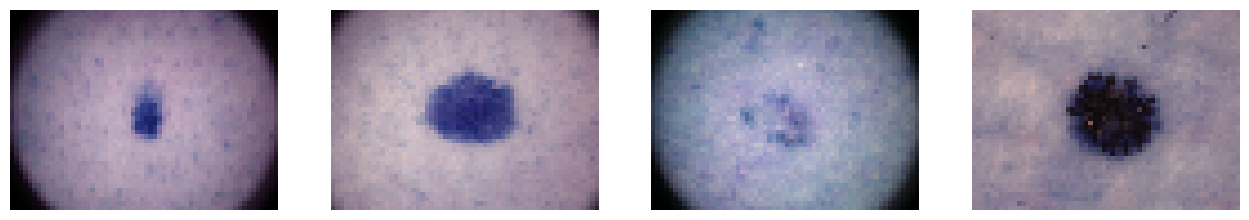

In [ ]:
fig = plt.figure(figsize=(20, 4))
for i, iname in enumerate(Samples):
    img_path = '/content/drive/MyDrive/PR dataset/SD_Images/'+iname
    img = cv2.imread(img_path)
    img = hair_noise_removal(img)
    img = downscale(img)
    ax = fig.add_subplot(1, 5, i + 1)
    ax.imshow(img)
    ax.axis('off')

plt.show()